# Data Pre-processing

In [1]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame

## Exercise 3.1 
### 각 CSV file 로부터 데이터 import 하고, ID 기준으로 하나의 테이블 구축 & ID column 삭제

In [2]:
# 데이터 불러오기
wine_a = pd.read_csv('IDA_A1_data/Wine_a.csv')
wine_b = pd.read_csv('IDA_A1_data/Wine_b.csv')

# 각 csv 파일을 ID로 합치기
wine_merge = pd.merge(wine_a,wine_b,on='ID',how='outer')

# ID column 버리기
wine_drop_ID = wine_merge.drop('ID',axis=1)
# wine_drop_ID
# 200 rows × 14 columns

## Exercise 3.2

### (1) Exercise 3.1 에서 만들어진 데이터 테이블에서 시작
### (2) 전체 column 동일 한 경우 Duplicate로 보고 삭제

In [3]:
# 전체 칼럼 value가 동일할 경우 Duplicate으로 보고 삭제
wine_drop_duplicate = wine_drop_ID.drop_duplicates()
# 37 행 삭제 
# 이거 처리 안해주고 while 돌리면 에러발생
wine_drop_duplicate[30:40]
# 199 rows × 14 columns

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
30,A,13.77,1.90,2.68,17.1,115.0,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375.0
31,A,13.48,1.81,2.41,NaN,100.0,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920.0
32,A,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0
33,A,NaN,NaN,NaN,22.2,91.0,NaN,NaN,1.34,NaN,NaN,1.51,NaN,NaN
34,A,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0
35,A,12.25,1.22,3.36,15.9,149.0,1.23,2.63,1.30,1.03,4.58,9999.00,2.01,359.0
36,A,13.83,1.57,2.62,20.0,115.0,2.95,3.40,0.40,1.72,6.60,1.13,2.57,1130.0
38,A,14.19,1.59,2.48,16.5,108.0,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680.0
39,A,13.68,1.83,2.36,17.2,104.0,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990.0
40,A,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0


### (4) 두개 이상의 value가 비어있으면 삭제 

In [4]:
# nan 들어있어도 평균 계산 시 제외되기 때문에 nan 이 두개 이상인 행 부터 삭제
# thresh 이용
wine_drop_many_nan = wine_drop_duplicate.dropna(thresh=13)
#wine_drop_many_nan
# 179 rows × 14 columns
# 인덱스 재조정 위해 파일 임시저장
# reindex 안되는 이유? => 그냥 index 지정 다시 해주면 됨.
wine_drop_many_nan.to_csv('final_data/wine_use_thresh.csv',index=False, na_rep='NULL')

In [48]:
wine_2 = pd.read_csv('final_data/wine_use_thresh.csv')
wine_2[:15]
#179 rows × 14 columns

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,13.88,1.89,2.59,15.0,101.0,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095.0
1,A,13.56,1.71,2.31,16.2,117.0,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795.0
2,A,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
3,A,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
4,A,14.10,2.02,2.40,18.8,103.0,2.75,2.92,0.32,2.38,6.20,NaN,2.75,1060.0
5,A,12.93,3.80,2.65,18.6,102.0,2.41,2.41,NaN,1.98,4.50,1.03,3.52,770.0
6,A,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080.0
7,A,13.05,1.77,2.10,17.0,107.0,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885.0
8,A,13.05,1.65,2.55,18.0,98.0,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105.0
9,A,14.22,1.70,2.30,16.3,118.0,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970.0


In [6]:
wine_2.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
count,179.000000,179.000000,176.000000,178.000000,176.000000,179.000000,178.000000,177.000000,179.000000,176.000000,176.000000,178.000000,179.000000
mean,62.573240,2.341564,2.379716,19.501124,100.551136,2.292235,2.042247,0.377853,1.599553,5.125170,57.765318,2.616292,741.916201
std,663.349722,1.121437,0.305759,3.343414,15.298840,0.632011,0.995390,0.187213,0.598041,2.386922,753.630788,0.725520,312.429765
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.350000,1.595000,2.210000,17.200000,88.000000,1.730000,1.227500,0.270000,1.245000,3.250000,0.780000,1.937500,500.000000
50%,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.155000,0.340000,1.550000,4.690000,0.965000,2.780000,672.000000
75%,13.675000,3.110000,2.565000,21.500000,108.000000,2.800000,2.887500,0.450000,1.955000,6.262500,1.120000,3.177500,977.500000
max,8888.000000,5.800000,3.910000,30.000000,162.000000,3.880000,5.080000,1.980000,3.920000,13.000000,9999.000000,4.540000,1680.000000


### (3) 하나만 비어있으면 해당 column의 평균값으로 대체

In [49]:
# nan 이 하나있는 행 찾아서 뭐기 비어있는지 column 확인하기
i=0
nan_arr=[]
while (i<179):
    if (wine_2.loc[i].isna().sum())==1:
        nan_arr.append(i)
        print(i)
        print(wine_2.loc[i])
    i=i+1
print(nan_arr)

4
Type                       A
Alcohol                 14.1
Malic_Acid              2.02
Ash                      2.4
Ash_Alcalinity          18.8
Magnesium                103
Total_Phenols           2.75
Flavanoids              2.92
Nonflavanoid_Phenols    0.32
Proanthocyanins         2.38
Color_Intensity          6.2
Hue                      NaN
OD280_OD315             2.75
Proline                 1060
Name: 4, dtype: object
5
Type                        A
Alcohol                 12.93
Malic_Acid                3.8
Ash                      2.65
Ash_Alcalinity           18.6
Magnesium                 102
Total_Phenols            2.41
Flavanoids               2.41
Nonflavanoid_Phenols      NaN
Proanthocyanins          1.98
Color_Intensity           4.5
Hue                      1.03
OD280_OD315              3.52
Proline                   770
Name: 5, dtype: object
28
Type                        A
Alcohol                 13.48
Malic_Acid               1.81
Ash                      2.41
A

In [50]:
# 위에서 구한 해당 column 값에 na 있으면 mean 값넣기
header = ['Hue','Ash_Alcalinity','Nonflavanoid_Phenols','Color_Intensity','OD280_OD315','Magnesium','Ash','Flavanoids']

for k in header:
    wine_2[k] = wine_2[k].fillna(wine_2[k].mean(axis=0))
# 어차피 지금 각 행마다 nan 하나씩 있고 이를 평균으로 처리할 거니까 
# column 의 평균을 axis=0 해서 nan 이면 평균값 넣기

In [51]:
wine_2[4:30]
# nan 값 처리 된거 확인 가능

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
4,A,14.10,2.02,2.40,18.800000,103.0,2.75,2.92,0.320000,2.38,6.20,57.765318,2.75,1060.0
5,A,12.93,3.80,2.65,18.600000,102.0,2.41,2.41,0.377853,1.98,4.50,1.030000,3.52,770.0
6,A,14.21,4.04,2.44,18.900000,111.0,2.85,2.65,0.300000,1.25,5.24,0.870000,3.33,1080.0
7,A,13.05,1.77,2.10,17.000000,107.0,3.00,3.00,0.280000,2.03,5.04,0.880000,3.35,885.0
8,A,13.05,1.65,2.55,18.000000,98.0,2.45,2.43,0.290000,1.44,4.25,1.120000,2.51,1105.0
9,A,14.22,1.70,2.30,16.300000,118.0,3.20,3.00,0.260000,2.03,6.38,0.940000,3.31,970.0
10,A,13.74,1.67,2.25,16.400000,118.0,2.60,2.90,0.210000,1.62,5.85,0.920000,3.20,1060.0
11,A,13.76,1.53,2.70,19.500000,132.0,2.95,2.74,0.500000,1.35,5.40,1.250000,3.00,1235.0
12,A,14.38,3.59,2.28,16.000000,102.0,3.25,3.17,0.270000,2.19,4.90,1.040000,3.44,1065.0
13,A,13.94,1.73,2.27,17.400000,108.0,2.88,3.54,0.320000,2.08,8.90,1.120000,3.10,1260.0


In [13]:
# 다시 임시저장
wine_2.to_csv('final_data/wine_no_nan.csv',index=False)

In [14]:
wine_3 = pd.read_csv('final_data/wine_no_nan.csv')
wine_3.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,62.573240,2.341564,2.379716,19.501124,100.551136,2.292235,2.042247,0.377853,1.599553,5.125170,57.765318,2.616292,741.916201
std,663.349722,1.121437,0.303171,3.334009,15.169370,0.632011,0.992590,0.186158,0.598041,2.366722,747.252980,0.723479,312.429765
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.350000,1.595000,2.215000,17.200000,88.000000,1.730000,1.235000,0.270000,1.245000,3.260000,0.785000,1.945000,500.000000
50%,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.140000,0.340000,1.550000,4.800000,0.980000,2.780000,672.000000
75%,13.675000,3.110000,2.560000,21.500000,108.000000,2.800000,2.885000,0.450000,1.955000,6.225000,1.120000,3.175000,977.500000
max,8888.000000,5.800000,3.910000,30.000000,162.000000,3.880000,5.080000,1.980000,3.920000,13.000000,9999.000000,4.540000,1680.000000


## (5) outlier 처리

proline 의 평균이 제일 크다.

In [15]:
# Type 을 삭제해야 제대로 outlie 할 수 있음 
wine_drop_type = wine_3.drop('Type',axis=1)
wine_outlie = wine_drop_type[((wine_drop_type)>np.std(wine_drop_type.Proline)*5)]
#wine_outlie 
# 삭제해야할 값만 숫자로 뜸
# ex 8888.0
# 179 rows × 13 columns

In [16]:
np.std(wine_drop_type.Proline)*5

1557.779169767691

In [17]:
for_drop_index = 0
while (for_drop_index<179):
    if (wine_outlie.loc[for_drop_index].isna().sum())<13:
    # 숫자 값이 하나라도 있으면
    # sum().any(1) 을 안붙이면 이상한 숫자 빼고 나머지 다 nan값
        wine_3 = wine_3.drop(for_drop_index)
    for_drop_index = for_drop_index + 1

In [18]:
wine_3
#176 rows × 14 columns

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,13.88,1.89,2.590000,15.000000,101.000000,3.25,3.560000,0.170000,1.70,5.430000,0.880000,3.56,1095.0
1,A,13.56,1.71,2.310000,16.200000,117.000000,3.15,3.290000,0.340000,2.34,6.130000,0.950000,3.38,795.0
2,A,13.24,2.59,2.870000,21.000000,118.000000,2.80,2.690000,0.390000,1.82,4.320000,1.040000,2.93,735.0
3,A,14.38,1.87,2.380000,12.000000,102.000000,3.30,3.640000,0.290000,2.96,7.500000,1.200000,3.00,1547.0
4,A,14.10,2.02,2.400000,18.800000,103.000000,2.75,2.920000,0.320000,2.38,6.200000,57.765318,2.75,1060.0
5,A,12.93,3.80,2.650000,18.600000,102.000000,2.41,2.410000,0.377853,1.98,4.500000,1.030000,3.52,770.0
6,A,14.21,4.04,2.440000,18.900000,111.000000,2.85,2.650000,0.300000,1.25,5.240000,0.870000,3.33,1080.0
7,A,13.05,1.77,2.100000,17.000000,107.000000,3.00,3.000000,0.280000,2.03,5.040000,0.880000,3.35,885.0
8,A,13.05,1.65,2.550000,18.000000,98.000000,2.45,2.430000,0.290000,1.44,4.250000,1.120000,2.51,1105.0
9,A,14.22,1.70,2.300000,16.300000,118.000000,3.20,3.000000,0.260000,2.03,6.380000,0.940000,3.31,970.0


## (6) 최종 결과 dataframe df_final.csv 로 저장

In [19]:
# 최종저장
wine_3.to_csv('final_data/df_ﬁnal.csv',index=False)

In [20]:
df_final = pd.read_csv('final_data/df_ﬁnal.csv', engine='python')
#df_final

# Data visualization

## Exercise 4.1

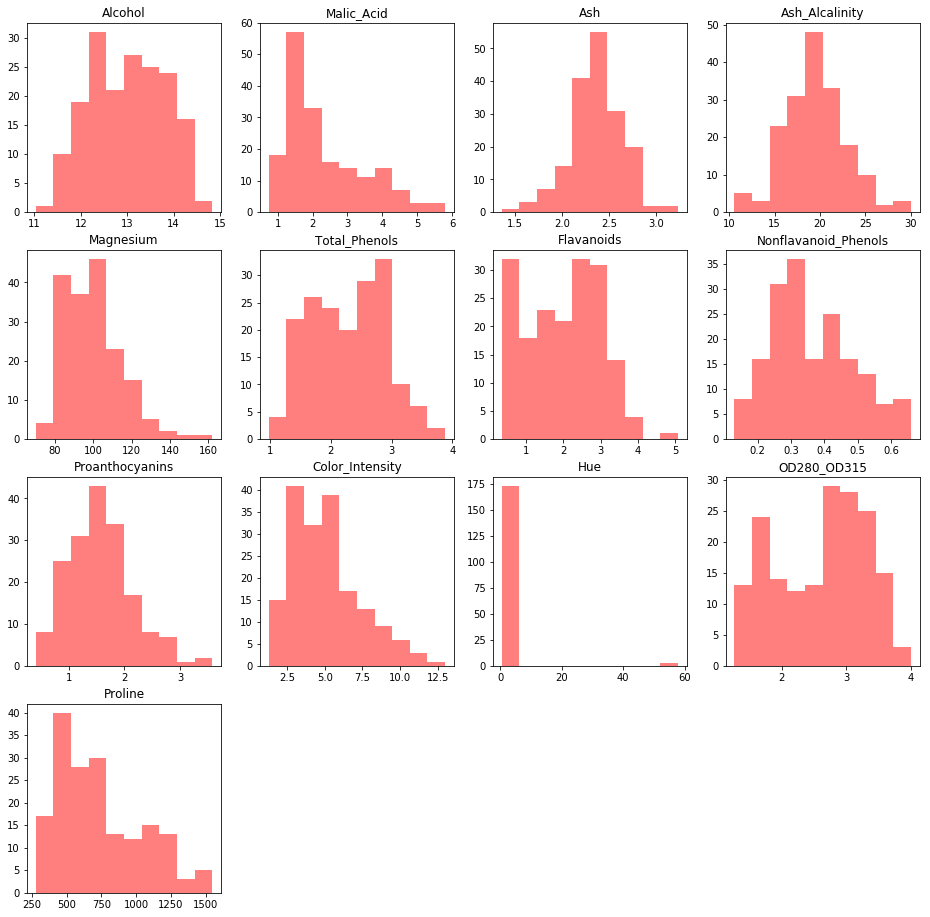

In [21]:
column_data=['Alcohol','Malic_Acid','Ash','Ash_Alcalinity','Magnesium','Total_Phenols',
              'Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue',
              'OD280_OD315','Proline']

fig_1 = plt.figure(figsize=[16,16])
v_1 = 1
for header in column_data:
    will_plot = df_final[header]
    fig_1_ax = fig_1.add_subplot(4,4,v_1)
    fig_1_ax.hist(will_plot,label=header,color='r',alpha=0.5)
    fig_1_ax.set_title(header)
    v_1 = v_1 + 1

## Exericse 4.2

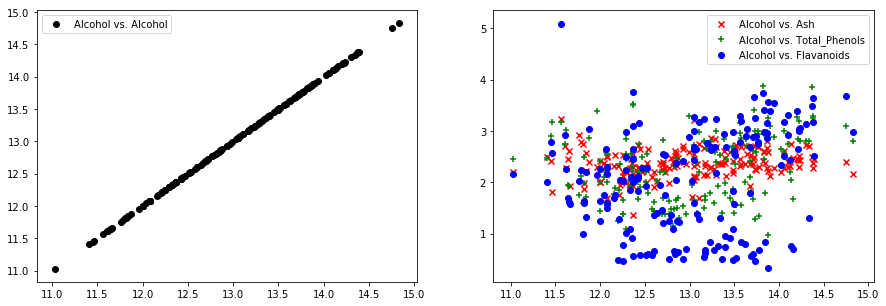

In [22]:
fig_2, ax_2 = plt.subplots(1,2,sharex='col',figsize=[15,5])
# 하나의 캔버스에 두개의 subplot
data_x = df_final.Alcohol
data_y = df_final.Alcohol
ax_2[0].scatter(data_x,data_y,color='k',label="Alcohol vs. Alcohol")
ax_2[0].legend(loc='best')
ax_2[1].scatter(data_x,df_final.Ash,color='r',marker='x',label="Alcohol vs. Ash")
ax_2[1].scatter(data_x,df_final.Total_Phenols,color='g',marker='+',label="Alcohol vs. Total_Phenols")
ax_2[1].scatter(data_x,df_final.Flavanoids,color='b',marker='o',label="Alcohol vs. Flavanoids")
ax_2[1].legend(loc='best')

# 5. Dimension Reduction

In [25]:
wine_5 = pd.read_csv('final_data/df_ﬁnal.csv',engine='python')

## Exericse 5.1

In [27]:
# wine type 별로 나누기
cnt_a = 0
cnt_b = 0
for i_type in wine.Type:
    if i_type == 'A':
        cnt_a = cnt_a + 1
    elif i_type == 'B':
        cnt_b = cnt_b + 1
print("cnt_a : \n{}\n".format(cnt_a))
print("cnt_b : \n{}\n".format(cnt_b))

cnt_a : 
57

cnt_b : 
71



In [35]:
wine_type_A = wine_5[:57]
wine_type_B = wine_5[57:128]
wine_type_C = wine_5[128:]

In [36]:
wine_a_statistics = wine_type_A.describe()
wine_b_statistics = wine_type_B.describe()
wine_c_statistics = wine_type_C.describe()
print("wine_a \n descriptive statistics : \n{}\n\n".format(wine_a_statistics))
print("wine_b \n descriptive statistics : \n{}\n\n".format(wine_b_statistics))
print("wine_c \n descriptive statistics : \n{}\n\n".format(wine_c_statistics))

wine_a 
 descriptive statistics : 
         Alcohol  Malic_Acid        Ash  Ash_Alcalinity   Magnesium  \
count  57.000000   57.000000  57.000000       57.000000   57.000000   
mean   13.736842    2.022982   2.455965       17.047388  106.614035   
std     0.466458    0.697360   0.231083        2.566152   10.424481   
min    12.850000    1.350000   2.040000       11.200000   90.000000   
25%    13.390000    1.670000   2.290000       16.000000   98.000000   
50%    13.740000    1.770000   2.440000       17.000000  104.000000   
75%    14.100000    1.950000   2.620000       18.800000  115.000000   
max    14.830000    4.040000   3.220000       25.000000  132.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count      57.000000   57.000000             57.000000        57.000000   
mean        2.836316    2.969649              0.291717         1.901579   
std         0.337901    0.382832              0.071919         0.419195   
min         2.200000    2

## Exercise 5.2

In [37]:
# compute correlation

wine_corr = wine.corr()
wine_corr

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
Alcohol,1.000000,0.103963,0.202737,-0.302531,0.262294,0.277716,0.221435,-0.149519,0.132017,0.516840,-0.079133,0.069878,0.637007
Malic_Acid,0.103963,1.000000,0.144977,0.284857,-0.055079,-0.330892,-0.402684,0.296615,-0.218456,0.253226,-0.022411,-0.368734,-0.181821
Ash,0.202737,0.144977,1.000000,0.438178,0.265350,0.133665,0.131509,0.197029,0.013205,0.240906,-0.031758,0.016896,0.220338
Ash_Alcalinity,-0.302531,0.284857,0.438178,1.000000,-0.098533,-0.315399,-0.340764,0.367045,-0.194741,0.048127,-0.057941,-0.275950,-0.433094
Magnesium,0.262294,-0.055079,0.265350,-0.098533,1.000000,0.204795,0.186941,-0.264443,0.225280,0.177418,0.042338,0.056208,0.402634
Total_Phenols,0.277716,-0.330892,0.133665,-0.315399,0.204795,1.000000,0.858799,-0.453246,0.612611,-0.071004,0.057140,0.700932,0.486796
Flavanoids,0.221435,-0.402684,0.131509,-0.340764,0.186941,0.858799,1.000000,-0.526878,0.649193,-0.192522,0.035785,0.789673,0.474849
Nonflavanoid_Phenols,-0.149519,0.296615,0.197029,0.367045,-0.264443,-0.453246,-0.526878,1.000000,-0.366743,0.160983,-0.068316,-0.496955,-0.315901
Proanthocyanins,0.132017,-0.218456,0.013205,-0.194741,0.225280,0.612611,0.649193,-0.366743,1.000000,-0.023203,0.002551,0.514811,0.330426
Color_Intensity,0.516840,0.253226,0.240906,0.048127,0.177418,-0.071004,-0.192522,0.160983,-0.023203,1.000000,-0.075180,-0.435562,0.288053


In [38]:
# 단순하게 만들기 위해서 삼각형 꼴
DataFrame(np.tril(wine_corr,k=0))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.103963,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.202737,0.144977,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,-0.302531,0.284857,0.438178,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.262294,-0.055079,0.265350,-0.098533,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.277716,-0.330892,0.133665,-0.315399,0.204795,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,0.221435,-0.402684,0.131509,-0.340764,0.186941,0.858799,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,-0.149519,0.296615,0.197029,0.367045,-0.264443,-0.453246,-0.526878,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,0.132017,-0.218456,0.013205,-0.194741,0.225280,0.612611,0.649193,-0.366743,1.000000,0.000000,0.000000,0.000000,0.0
9,0.516840,0.253226,0.240906,0.048127,0.177418,-0.071004,-0.192522,0.160983,-0.023203,1.000000,0.000000,0.000000,0.0


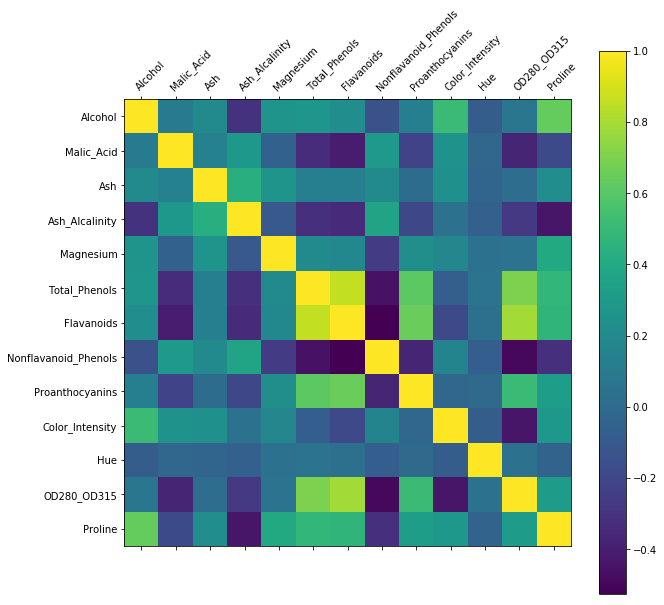

In [40]:
# heatmap
fig_wine, ax_wine = plt.subplots(figsize=(10,10))
cax = ax_wine.matshow(wine_corr)
fig_wine.colorbar(cax)
plt.xticks(range(len(wine_corr.columns)), wine_corr.columns);
plt.setp(ax_wine.get_xticklabels(), rotation=45, ha='left', rotation_mode='anchor');
plt.yticks(range(len(wine_corr.columns)), wine_corr.columns);

- Diagonal(correlation= 1)을 제외하고 가장 강한 positive correlation을 보이는 두 변수는 Total_Phenols, Flavanoids
 
- x = Total_Phenols
 
- y = Flavanoids

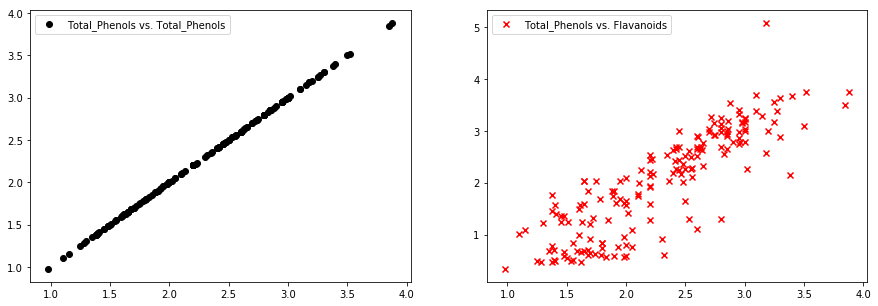

In [41]:
fig_3, ax_3 = plt.subplots(1,2,sharex='col',figsize=[15,5])
data_x = wine.Total_Phenols
data_y = wine.Flavanoids
ax_3[0].scatter(data_x,data_x,color='k',label="Total_Phenols vs. Total_Phenols")
ax_3[0].legend(loc='best')
ax_3[1].scatter(data_x,data_y,color='r',marker='x',label="Total_Phenols vs. Flavanoids")
ax_3[1].legend(loc='best')

### Exercise 4.2 vs Exercise 5.2  (우측그래프)

- 4.2 scatter 그래프에서 x 축 기준을 Alcohol로 잡고 y축의 분포형태를 본다면,Total_phenols가 높은곳 낮은곳, Flavanoids가 높은곳 낮은곳에 서로 찍혀있는 것으로 봐서 둘이 관련이 있음을 대충 알 수 있다. 다만 postive 인지 negative 인지는 정확히 알 수는 없을 거 같다 
- 5.2 scatter 를 보면 positive 형태를 가진다. 이를 통해 Total_phenols 와 Flavanoids는 postive 한 관계를 가지는 것을 확인 할 수 있다.
- 특히, 몰려있는 부분을 따라 linear한 그래프를 그릴 수 있으므로, x와 y의 관계가 강하다. 즉 Total_Phenols 와 Flavanoids 는 상관 관계가 높다.

#### - 정리하자면, 4.2 의 scatter를 통해 분포형태를 보았을때 Total_phenols 와 Flavanoids 는 어떠한 관계가 있음을 추측할 수 있었다.

#### - 그리고 공분산,상관계수를 활용해 Heatmap 을 그려서 가장 가장 관계가 높은 Total_phenols와 Flavanoids를 가지고 scateer를 그렸을 때, 4.2 에서 추축한 관계가 postive 하고 강력한 상관관계를 가짐을 알 수 있다.


# Exercise 5.3

In [42]:
wine_pnf = DataFrame(wine.loc[:,['Total_Phenols','Flavanoids']])
wine_pnf.iloc[0:10,:]

,Total_Phenols,Flavanoids
0,3.25,3.56
1,3.15,3.29
2,2.80,2.69
3,3.30,3.64
4,2.75,2.92
5,2.41,2.41
6,2.85,2.65
7,3.00,3.00
8,2.45,2.43
9,3.20,3.00


In [43]:
wine_pnf.cov()

,Total_Phenols,Flavanoids
Total_Phenols,0.389809,0.529093
Flavanoids,0.529093,0.973707


positive correlation 임을 알 수 있다

## Normalization

정규화는 PCA, PS 를 구하는데 무조건 항상 해줘야한다

In [53]:
# sklearn library에서 pca import
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
wine_num = wine.iloc[:,1:np.size(wine.iloc[0,:])]
#wine_num
# Type 은 딱히 볼 필요가 없기 때문에 Alcohol 부터 출력 
# (전체 데이터, type 무시)

# Normalization
scaler = StandardScaler()
scaler.fit(wine_num)
wine_num_scaled = scaler.transform(wine_num)

# scikit-learn 에서 scale(x)은 기본 스케일, 평균 표준편차에 사용
# 파이프라인 이용하면 스케일링을 scaler 클래스 써야함
# => StandardScaler
# fit() 메서드와 트레이닝 데이터를 사용하여 변환 계수 추정
# transform() 메서드를 사용하여 실제로 자료를 반환

# apply pca
wine_pca_num = PCA(n_components = 10)
# pca component = 10 개
wine_pca_num_res = wine_pca_num.fit(wine_num_scaled)

# results of PCA
PCA_result=['Variance','Variance\%','Cum\%']
wine_pca_num_res_pc = np.transpose(np.array(wine_pca_num_res.components_).reshape(np.shape(wine_pca_num_res.components_)))
wine_pca_num_res_var = np.array(np.transpose(wine_pca_num_res.explained_variance_[:,np.newaxis]))
wine_pca_num_res_varp = np.array(np.transpose(wine_pca_num_res.explained_variance_ratio_[:,np.newaxis]))
wine_pca_num_res_sum = np.cumsum(np.round(wine_pca_num_res.explained_variance_ratio_,decimals=8)*100)
wine_pca_num_res_varc = np.array(np.transpose(wine_pca_num_res_sum[:,np.newaxis])) 

wine_pca_num_res_tab = DataFrame(np.concatenate((wine_pca_num_res_pc, 
                                                 wine_pca_num_res_var, 
                                                 wine_pca_num_res_varp, 
                                                 wine_pca_num_res_varc), 
                                                axis = 0),
                                 index = np.concatenate((np.array(wine_num.columns), PCA_result)), 
                                 columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

wine_pca_num_res_tab.to_csv('final_data/df_pca_result.csv',index=False)
wine_pca_num_res_tab

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Alcohol,0.179799,0.485650,-0.227153,-0.093256,-0.225713,-0.073207,-0.209847,-0.126002,-0.254082,-0.620566
Malic_Acid,-0.225682,0.246653,0.079711,0.029909,-0.391317,0.688788,-0.398917,0.210801,0.114000,0.161908
Ash,0.016209,0.350522,0.608631,0.052467,0.041694,-0.286305,-0.203280,-0.037992,0.056107,0.326894
Ash_Alcalinity,-0.250592,0.041759,0.606277,-0.002521,0.060988,0.093209,0.100165,-0.380784,-0.301846,-0.282939
Magnesium,0.166271,0.295208,0.063481,0.377641,0.686856,0.225953,-0.020661,0.320377,0.165001,-0.263069
Total_Phenols,0.416351,0.000603,0.170978,-0.046659,-0.207525,-0.017753,0.075154,0.005943,0.520794,-0.114620
Flavanoids,0.435786,-0.068607,0.185841,-0.068651,-0.133267,-0.026020,-0.000219,-0.010415,0.240191,0.014564
Nonflavanoid_Phenols,-0.319724,0.109717,0.167556,-0.139653,-0.245481,-0.372614,0.207383,0.709805,0.050921,-0.234022
Proanthocyanins,0.334419,-0.017016,0.170735,-0.063919,-0.105353,0.407720,0.594698,0.232741,-0.418427,0.074037
Color_Intensity,-0.057369,0.537602,-0.138869,-0.023588,-0.136711,0.014430,0.480168,-0.332380,0.300537,0.100989


약 8~90% 에서 cut 할 수 있기 때문에 PC8 에서 cut 이 가능하다 

## PS (Principal Scores) 구하기

In [56]:
wine_pca_num_res_ps = wine_pca_num.fit_transform(wine_num_scaled)
wine_pca_num_res_ps_tab = DataFrame(data=wine_pca_num_res_ps,
                                   index=wine_pnf.index)
wine_pca_num_res_ps_tab.iloc[0:10,:]

,0,1,2,3,4,5,6,7,8,9
0,3.412481,0.625321,-0.204761,-0.280024,-0.375872,-0.361686,-0.967839,-0.631472,0.571324,0.378840
1,2.780969,0.398880,-0.069383,-0.074114,0.108307,0.320808,0.710554,0.631268,0.666485,-0.720479
2,1.026958,0.950558,1.934325,0.274679,0.492432,-0.007475,-0.459939,0.538232,0.426543,-0.242475
3,4.368152,1.883643,-1.290837,-0.575193,-1.036289,-0.059816,0.921300,0.768625,-0.435432,0.829608
4,2.256409,0.470176,-0.189868,6.583892,-3.378367,-0.983028,1.147819,-0.263637,-1.282239,-0.434900
5,0.780864,0.286016,1.111600,-0.154259,-0.654254,0.817286,-0.815757,0.766044,-0.000870,0.403776
6,1.464953,1.563113,-0.009796,-0.000295,-0.551877,0.695788,-1.842827,0.101183,0.275747,-0.465969
7,2.315312,-0.527051,-0.545488,-0.185445,0.076751,0.388165,0.314676,0.167265,0.342903,-0.264347
8,0.996792,0.251618,-0.114245,-0.079498,0.338030,-0.861714,-0.532840,-0.230322,-0.218846,0.876615
9,3.002209,1.046945,-0.615909,0.009582,0.227734,0.182050,0.094008,0.002474,0.420870,-0.879828


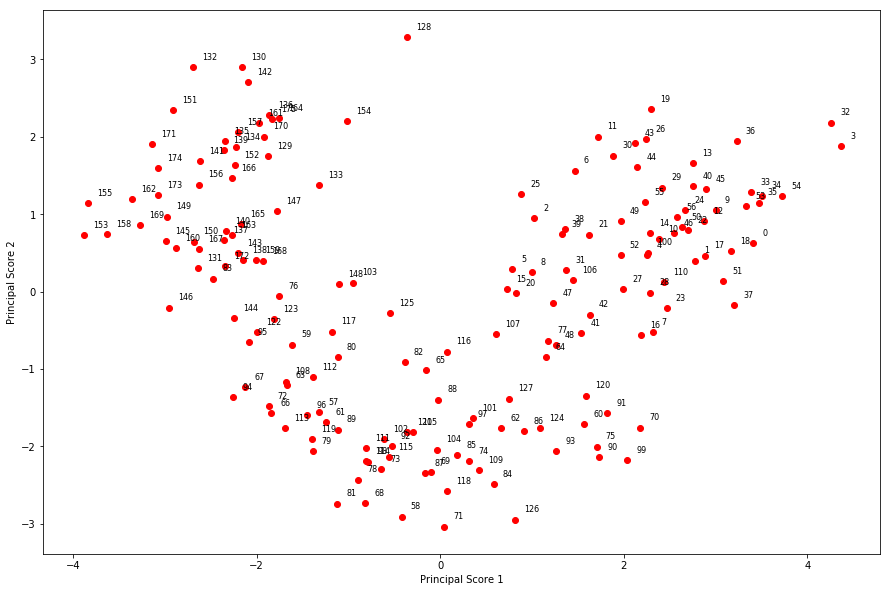

In [57]:
#PC1 vs PC2
fig_dist = plt.figure(figsize=[15,10])

label = np.array(wine.index)
x_coords = np.array(wine_pca_num_res_ps_tab.iloc[:,0])
y_coords = np.array(wine_pca_num_res_ps_tab.iloc[:,1])

for ps_i , type in enumerate(label):
    x = x_coords[ps_i]
    y = y_coords[ps_i]
    plt.scatter(x,y,marker='o',color='red')
    plt.text(x+0.1, y+0.1, type, fontsize=8)
plt.xlabel('Principal Score 1')
plt.ylabel('Principal Score 2')
plt.show()

- cumsum 이 PC8 에서 91.333348 값을 가지기 때문에 PC8에서 cut을 해줘도 된다
- 이는 10개를 8개로 줄인효과가 있다. 
- 또한 PCA 표를 보면, 4.2 나 5.2 에서 보던 그래프처럼 Total_Phenols 와 Flavanoids 가 관계가 있음을 또 다시 확인 할 수 있다.
- PC1 에서 Flavanoids 의 가중치가 크기 때문에 PC1은 이를 설명하고 있다고 볼 수 있다.
- PC1 에서 Flavanoids 가 양수면 Total_Phenls 도 양수이기 때문에 Flavanoids이 높으면 Total_Phenols가 높다는 것을 추측 할 수 있다.
- PC2 는 color-intensity의 가중치가 제일 높기 때문에 이에 대해 설명하고 있다고 볼 수 있다.
- PC2 를 통해 color-intensity 가 높으면 Total_Phenols 도 높음을 추측할 수 있다.

- PS 표는 PCA 가중치를 준 거고, 차이가 크게 날수록 확실하게 나뉘는 data이다

- PS (Principal Scores) scatter 그래프를 통해 한번더 분석,
- 벡터값으로 3,32 랑 94,146 값을 비교했을때
- 3 - Total_Phenols : 2.8 Flavanoids : 2.69 Color-intensity: 6.13
- 132 - Total_Phenols : 1.36  Flavanoids: 0.76 Color-intensity: 2.45
- y축으로 커질수록 PC2상 높은 거고, x 축으로 커질 수록 PC1상 높은거다.
- 따라서 전체적인 벡터가 큰 3번은 Total_Phenols과 Flavanoids 의 관계가 높고, Total_phenols 이 높은 편이기에 color-intensity도 높다.